In [1]:
using PyPlot

### 1)
Take magnification maps made by the planet_star.jl microlensing code & add code to convolve the map with circular sources of a range of sizes (0.25 - 4 $R_{E,planet}$).  Plot how the maximum magnification varies with the ratio of the angular size of the source to the Einstein angle of the planet, locating the planet at uplanet=1.3 times the Einstein angle of the star.

In [2]:
include("/Users/mlazz/Dropbox/UW/Spring2016/ASTR598/ExoJulia/Homework/hw5/Iryna_Margaret/planet_moon_star_copy.jl")

planet_moon_star (generic function with 1 method)

In [3]:
#Function to create an array with a circle made of 1's of a given radius in Einstein Radii
function makecircle(r)
    length = 1000
    map = zeros(Float64, length, length)
    for i in range(1, length)
        for j in range(1, length)
            X = (i - 1/2 - length/2.)*(10/length) #multiplied by factors at end to convert from cells to R_E
            Y = (j - 1/2 - length/2.)*(4/length)  #multiplied by factors at end to convert from cells to R_E
            dist = sqrt(X^2 + Y^2) #Distance between points in terms of R_E
            if dist <= r
                map[i,j] = 1.0
            end
        end
    end
    return map
end

makecircle (generic function with 1 method)

In [4]:
yplanet = 1.3
y1moon = 0.0
y2moon = 0.0
eps1 = 1e-5
eps2 = 0.5
lensing_map = planet_moon_star(yplanet,y1moon,y2moon,eps1,eps2) ;

Mass ratio: 1.0e-5
1000/10000
2000/10000
3000/10000
4000/10000
5000/10000
6000/10000
7000/10000
8000/10000
9000/10000
10000/

In [5]:
circle = makecircle(0.25) ;

10000
Range of grid, y1: 1.284188611699158 1.2892277011506363 1.315811388300842 1.310835544402567
Range of grid, y2: -0.047434164902525694 -0.017621792261288294 0.047434164902525694 0.017621792261288294


In [34]:
radii = linspace(0.25, 4.0, 10)
maxmag = zeros(length(radii))

for i in range(1, length(radii))
    println("Calculating for radius = ", radii[i])
    circle = makecircle(radii[i])
    convolution = conv2(circle, lensing_map)
    maxmag[i] = maximum(convolution) / (pi * radii[i]^2)
end
println("Complete.")

Calculating for radius = 0.25
Calculating for radius = 0.6666666666666666
Calculating for radius = 1.0833333333333333
Calculating for radius = 1.5
Calculating for radius = 1.9166666666666667
Calculating for radius = 2.3333333333333335
Calculating for radius = 2.75
Calculating for radius = 3.1666666666666665
Calculating for radius = 3.5833333333333335
Calculating for radius = 4.0
Complete.


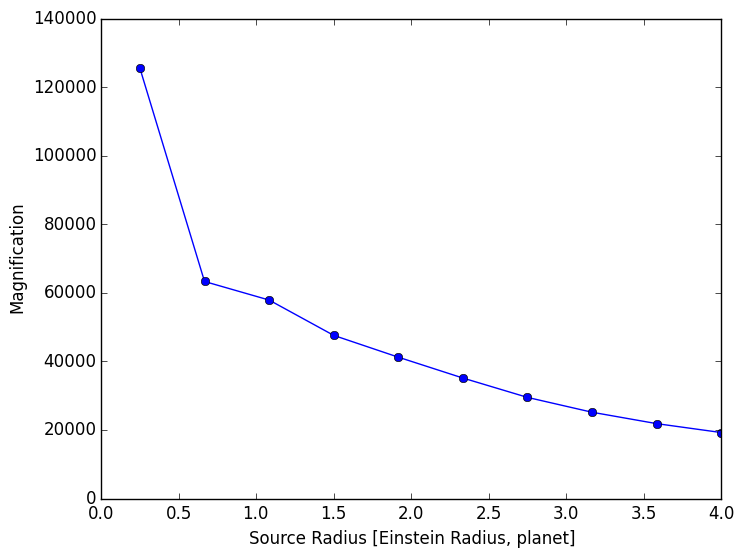

PyObject <matplotlib.text.Text object at 0x31a837150>

In [39]:
plot(radii, maxmag,"-o")
xlabel("Source Radius [Einstein Radius, planet]")
ylabel("Magnification")

### 2)
Taking an Earth-mass planet orbiting a 0.3 solar mass star at a lens distance of 5 kpc, and a source at 8kpc, what is the Einstein angle of the planet in $\mu as$?  What angular size of the source is needed to have a deviation greater than 20% relative to a lens without a planet?   What is this in solar radii?  Are giant stars viable targets for microlensing surveys for Earth-like planets?  How does this motivate WFIRST-AFTA?

The equation for finding the Einstin angle is:
$\theta_{E} = \frac{r_E}{d_{L}} = \sqrt{\frac{4GM}{c^{2}}\frac{d_{ls}}{d_{L}d_{s}}}$

In [21]:
G = 6.67259E-8 #cm^3/g/s^2
c = 2.99792458E10 #cm/s
kpctocm = 3.086E21 #cm in a kpc
M_sun = 1.99E33 #g
M_earth = 5.976E27 #g
radtoarcsec = 206265

theta_E = sqrt((4G*(M_earth))/c^2. * (3kpctocm/(8kpctocm * 5kpctocm)))
println("Einstein Angle = ", theta_E*radtoarcsec*10^6, " µas")

Einstein Angle = 1.3546279097167955 µas


In [33]:
d_L = 5
r_E = d_L*theta_E
println("Einstein radius = ", r_E, " kpc")
println("R_source = ", r_E/1.2, " kpc")
#The radius of the source should be r_E/1.2 if we want to have 20% magnification, or an Einstein radius that is 
#20% larger than the radius of the source. We then need to convert from kpc to the angular size of the source,
#which is at a distance of 8 kpc from the observer. Tan(theta) = dist/radius, using small angle approximation,
#theta = dist/radius (where dist = 8kpc and radius is the r_E/1.2 radius of the source)
println("Angular size of the source = ", ((r_E/1.2)/8)*radtoarcsec*10^6, " µas")
println("In solar radii this = ", (r_E/1.2)*3.086E21/6.96E10, " R_sun")

Einstein radius = 3.283707632697733e-11 kpc
R_source = 2.736423027248111e-11 kpc
Angular size of the source = 0.7055353696441644 µas
In solar radii this = 1.2133048077712172 R_sun


Given that the radius of the source we looked at that would give ~20% magnifiation with an Earth-size planet as a len was only 1.2 time the radius of the sun, giant stars are not viable targets for microlensing surveys looking for Earth size planets. This means that WFIRST-AFTA should focus on stars with radii $\leq$ 1.2 $R_{\odot}$.